In [28]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

dados = pd.read_csv("aluguel.csv", sep = ";")
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


##Informações gerais sobre a base de dados

In [29]:
tipos_de_dados = pd.DataFrame(dados.dtypes, columns = ["Tipos de Dados"])
tipos_de_dados.columns.name = "Variáveis"
tipos_de_dados

Variáveis,Tipos de Dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


In [30]:
print(f"A base de dados apresenta {dados.shape[0]} e  {dados.shape[1]} variáveis!")

A base de dados apresenta 32960 e  9 variáveis!


##Tratamento de dados da base

**Tipos de imóveis**

In [31]:
#Cria Series com a coluna do DataFrame
tipo_de_imovel = dados["Tipo"]
#Tira objetos repetidos da coluna e mantém a modificação depois da visualização
#tipo_de_imovel.drop_duplicates(inplace = True)


**Selecionando itens, imóveis residenciais**

In [32]:
residencial = ["Quitinete", "Casa", "Apartamento", "Casa de Condomínio", "Casa de Vila"]

selecao = tipo_de_imovel.isin(residencial)
#criando DataFrame que filtra imóveis com base no valor de True or False
dados_residencial = dados[selecao]
dados_residencial

#reconstruindo index perdidos na selecao

dados_residencial.index = range(0,dados_residencial.shape[0])
dados_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


**Exportando Base de Dados**

In [33]:
#dados_residencial.to_csv()

##Extraindo Dados do DataSet dados_residencial / Seleções e Frequências

**Selecionando imóveis do tipo apartamento**

In [34]:
#fazendo processo de seleção de dados novamente
selecao = dados["Tipo"] == "Apartamento"
selecao
n1 = dados[selecao].shape[0]


**Selecionando imóveis do tipo Casa, Casa de Condomínio ou Casa de Vila**

In [35]:
#fazendo processo de seleção de dados novamente
selecao = (dados["Tipo"] == "Casa") | (dados["Tipo"] == "Casa de Condomínio") | (dados["Tipo"] == "Casa de Vila")
n2 = dados[selecao].shape[0]

**Selecionando Imóveis de pelo 60 metros quadrados até 100 metros quadrados**

In [36]:
selecao = (dados["Area"] >=60) & (dados["Area"] <= 100)
n3 = dados[selecao].shape[0]

**Selecionando Imóveis de pelo menos 4 quartos e aluguel menor do que 2K**

In [37]:
selecao = (dados["Quartos"]>=4) & (dados["Valor"]<2000)
n4 = dados[selecao].shape[0]

In [38]:
print("Número de imóveis classificados como Aartamentos : {}".format(n1))
print("Número de imóveis classificados como Casa, Casa de Condomínio ou Casa de Vila : {}".format(n2))
print("Número de imóveis classificados como no intervalo de 60<x<100 : {}".format(n3))
print("Número de imóveis classificados como tendo pelo menos 4 quartos e aluguel menor do quê 2000: {}".format(n4))

Número de imóveis classificados como Aartamentos : 19532
Número de imóveis classificados como Casa, Casa de Condomínio ou Casa de Vila : 2212
Número de imóveis classificados como no intervalo de 60<x<100 : 10187
Número de imóveis classificados como tendo pelo menos 4 quartos e aluguel menor do quê 2000: 43


# Tratando dados faltantes

In [39]:
#visualizando dados faltantes
dados.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
32955,False,False,False,False,False,False,False,False,False
32956,False,False,False,False,False,False,False,False,False
32957,False,False,False,False,False,False,False,False,False
32958,False,False,False,False,False,False,False,False,True


In [40]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [41]:
#criando DataFrame com valores nulos na coluna Valor
dados.dropna(subset = ["Valor"],inplace = True)
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


**Tratamentos de Dados Faltantes condicional**

In [42]:
#Eliminando imóveis do tipo apartamento com condominio Nulo
selecao = (dados["Tipo"] == "Apartamento") & (dados["Condominio"].isnull())

dados = dados[~selecao]
#Preenchendo dados nulos restantes em todas as varíaveis com 0
dados.fillna(0,inplace = True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


# **Alterando varíaveis ao DataFrame**

In [43]:
#Criando nova varíavel/coluna resultante de expressão entre colunas já existentes
dados["Valor Bruto"] = dados["Valor"] + dados["Condominio"]

dados["Valor m2"] = dados["Valor"]/dados["Area"]
dados["Valor m2"] = dados["Valor m2"].round(2)
dados["Valor Bruto m2"] = dados["Valor Bruto"]/dados["Valor m2"]
dados["Valor Bruto m2"] = dados["Valor Bruto m2"].round(2)

casa = ["Casa", "Casa de Condomínio", "Casa de Vila"]

dados["Tipo Agregado"] = dados["Tipo"].apply(lambda x: "Casa" if x in casa else "Apartamento")
dados.head(10)


<ipython-input-43-73ba57653a86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Valor Bruto"] = dados["Valor"] + dados["Condominio"]
<ipython-input-43-73ba57653a86>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Valor m2"] = dados["Valor"]/dados["Area"]
<ipython-input-43-73ba57653a86>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,42.50,51.76,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,100.00,Casa
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,34.67,265.94,Apartamento
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,53.33,22.31,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,61.79,Apartamento
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,26.00,61.58,Apartamento
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,750.09,Casa
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,65.02,Casa
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,54193.0,50.36,1076.11,Apartamento
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2142.0,21.43,99.95,Apartamento


**Excluindo variáveis**

In [44]:
#Exluir variáveis que não serão necessárias para análise, apenas para operações que já foram realizadas

In [45]:
dados.drop(["Valor Bruto", "Valor Bruto m2"], axis=1,inplace = True)
dados.head(10)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,34.67,Apartamento
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,50.36,Apartamento
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento


# Estatísticas descritivas da base de dados

In [46]:


bairros = ["Barra da Tijuca", "Copacabana", "Ipanema", "Leblon","Botafogo","Flamengo","Tijuca"]

selecao = dados["Bairro"].isin(bairros)

dados = dados[selecao]


#Criando grupos com os bairros selecionados/indexa
grupo_bairro = dados.groupby("Bairro")
#printando média de acordo com o grupo selecionado do dataset
for bairro, data in grupo_bairro:
  print("{} -> {}".format(bairro,data.Valor.mean()))

Barra da Tijuca -> 9035.204743465634
Botafogo -> 19709.716814159292
Copacabana -> 4514.538436482085
Flamengo -> 6923.498132004981
Ipanema -> 10455.031861629495
Leblon -> 11072.38930774503
Tijuca -> 2964.5705794947994


In [47]:
#gerando dados estatísticos sobre o grupo selecionado
grupo_bairro["Valor"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,6198.0,9035.20,30328.23,100.0,2000.0,3500.0,8000.0,738197.0
Botafogo,1356.0,19709.72,129879.42,299.0,2500.0,4000.0,11000.0,4500000.0
Copacabana,3070.0,4514.54,6502.57,100.0,1900.0,3000.0,4900.0,198000.0
Flamengo,803.0,6923.50,15848.59,200.0,1900.0,3000.0,5300.0,212544.0
Ipanema,2197.0,10455.03,21002.14,100.0,4000.0,6900.0,12000.0,800000.0
Leblon,1459.0,11072.39,20830.80,100.0,4500.0,7000.0,11900.0,430000.0
Tijuca,1346.0,2964.57,8017.45,320.0,1400.0,1800.0,2500.0,230000.0


In [48]:
grupo_bairro.aggregate(["min", "max", "sum"])

Tipo                  \
                         min             max   
Bairro                                         
Barra da Tijuca  Apartamento  Terreno Padrão   
Botafogo         Apartamento  Terreno Padrão   
Copacabana       Apartamento          Studio   
Flamengo         Apartamento       Quitinete   
Ipanema          Apartamento       Quitinete   
Leblon           Apartamento       Quitinete   
Tijuca           Apartamento       Quitinete   

                                                                   Quartos  \
                                                               sum     min   
Bairro                                                                       
Barra da Tijuca  Conjunto Comercial/SalaCasa de CondomínioApart...       0   
Botafogo         Prédio InteiroFlatApartamentoApartamentoCasa C...       0   
Copacabana       QuitineteApartamentoQuitineteApartamentoAparta...       0   
Flamengo         QuitineteApartamentoConjunto Comercial/SalaApa...       0   
Ipanema          ApartamentoApartamentoApartamentoApartamentoAp...       0   
Leblon           FlatApartamentoApartamentoApartamentoApartamen...       0   
Tijuca           ApartamentoApartamentoApartamentoApartamentoAp...       0   

                           Vagas              Suites  ...  Condominio IPTU  \
                max    sum   min   max    sum    min  ...         sum  min   
Bairro                                                ...                    
Barra da Tijuca  23  11973     0   670  16515      0  ...  21633644.0  0.0   
Botafogo         22   2084     0    90   3120      0  ...   3816275.0  0.0   
Copacabana       24   6171     0  1960   5522      0  ...   3632543.0  0.0   
Flamengo          8   1599     0    32    833      0  ...   1517823.0  0.0   
Ipanema          10   5156     0    30   2681      0  ...   5013913.0  0.0   
Leblon            6   3656     0    10   2004      0  ...   3277618.0  0.0   
Tijuca           11   2612     0    60   1211      0  ...   1066126.0  0.0   

                                     Valor m2                     \
                      max        sum      min      max       sum   
Bairro                                                             
Barra da Tijuca  450625.0  9582422.0     1.11      inf       NaN   
Botafogo          70000.0  1288943.0    14.29  15000.0  91234.72   
Copacabana        66030.0  1324739.0     2.78      inf       NaN   
Flamengo          42450.0   337560.0    12.50      inf       NaN   
Ipanema           60230.0  1926570.0     3.33      inf       NaN   
Leblon           196070.0  1387561.0     6.67    800.0  99477.87   
Tijuca            51784.0   403765.0     8.20      inf       NaN   

                Tipo Agregado        \
                          min   max   
Bairro                                
Barra da Tijuca   Apartamento  Casa   
Botafogo          Apartamento  Casa   
Copacabana        Apartamento  Casa   
Flamengo          Apartamento  Casa   
Ipanema           Apartamento  Casa   
Leblon            Apartamento  Casa   
Tijuca            Apartamento  Casa   

                                                                    
                                                               sum  
Bairro                                                              
Barra da Tijuca  ApartamentoCasaApartamentoCasaApartamentoApart...  
Botafogo         ApartamentoApartamentoApartamentoApartamentoAp...  
Copacabana       ApartamentoApartamentoApartamentoApartamentoAp...  
Flamengo         ApartamentoApartamentoApartamentoApartamentoAp...  
Ipanema          ApartamentoApartamentoApartamentoApartamentoAp...  
Leblon           ApartamentoApartamentoApartamentoApartamentoAp...  
Tijuca           ApartamentoApartamentoApartamentoApartamentoAp...  

[7 rows x 30 columns]

**Gerando gráficos para visualização com matplotlib.pyplot**

<AxesSubplot:xlabel='Bairro'>

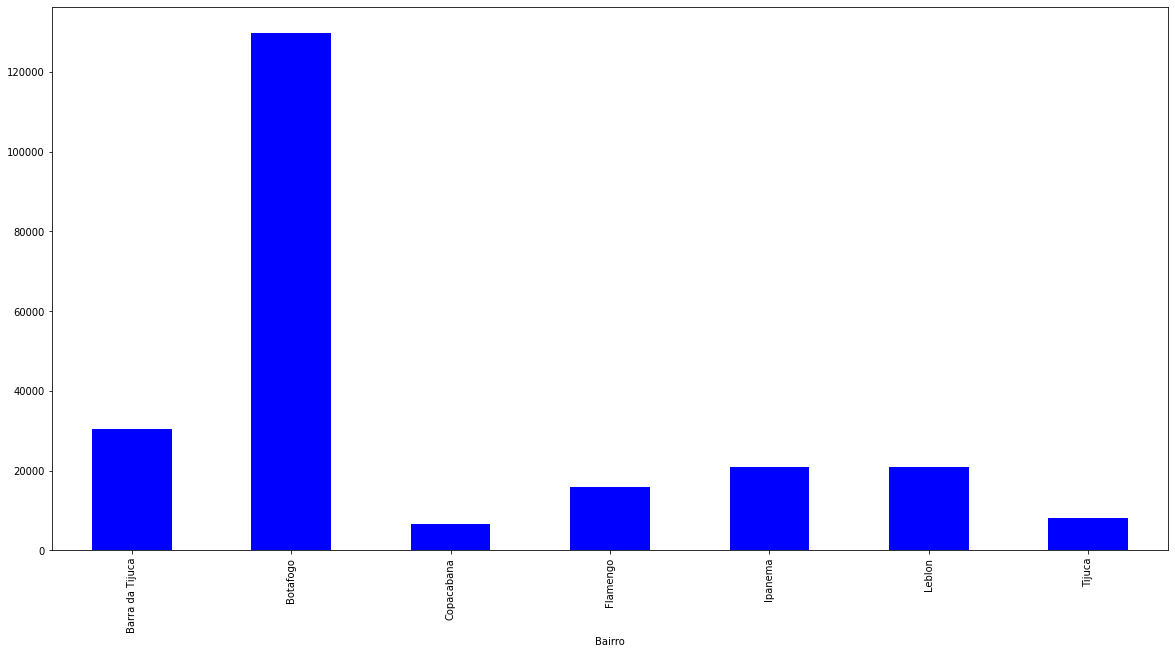

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc("figure", figsize = (20,10))

grupo_bairro["Valor"].std().plot.bar(color = "b")

**Detectando e removendo outliers**

<AxesSubplot:>

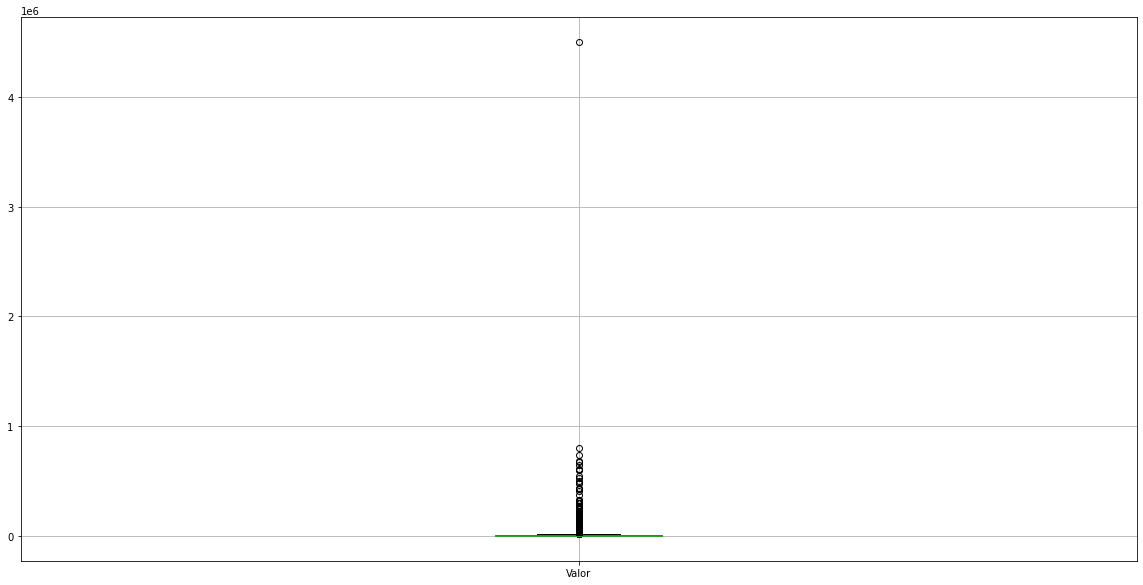

In [50]:
dados.boxplot(["Valor"])

<AxesSubplot:>

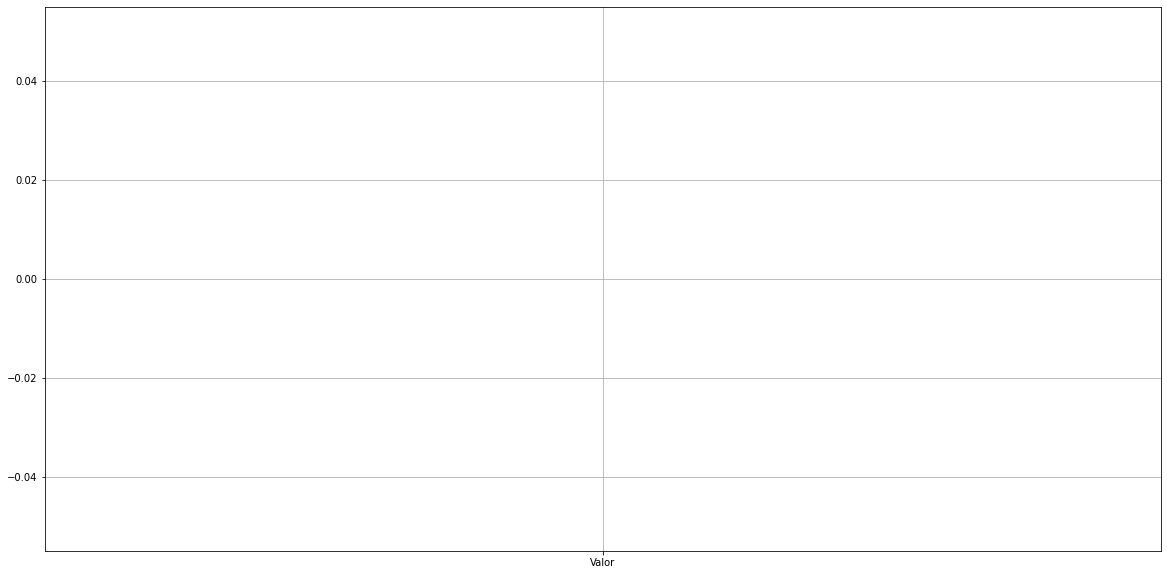

In [51]:
valor = dados["Valor"]

Q1= valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3-Q1
limite_inferior = Q1-1.5*IIQ
limite_superior = Q3-1.5*IIQ
selecao = (valor>= limite_inferior) & (valor <= limite_superior) 
dados_new = dados[selecao]
dados_new.boxplot(["Valor"])